## Assignment 2 - please answer the questions as thoroughly as possible, and provide detailed interpretation whenever possible

## Question 1 (5 points)

Import the csv file into the notebook as a dataframe and print the first five rows.

In [16]:
#answer here
import pandas as pd
bank = pd.read_csv('banklist.csv')
bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


## Question 2 (20 points)

Part (a) [3 points]: 

How many rows and columns do we have in this dataset? Print the datatype for each column.

In [17]:
#answer here
rownumber = len(bank)#555rows
colnumber =len(bank.columns)#
print('rownumber is ', rownumber,'.','colnumber is', colnumber)
bank.dtypes

rownumber is  555 . colnumber is 7


Bank Name                object
City                     object
ST                       object
CERT                      int64
Acquiring Institution    object
Closing Date             object
Updated Date             object
dtype: object

Part (b) [2 points]

Check to see if there are any missing values in the dataset?

In [18]:
#answer here
import numpy as np
print(bank.isnull().sum())
#there are no missing value

Bank Name                0
City                     0
ST                       0
CERT                     0
Acquiring Institution    0
Closing Date             0
Updated Date             0
dtype: int64


Part (c) [5 points]

Consider that Acquiring Institution column is the institution that holds various banks. What are the top 4 acquiring institutions among the banks that have acquiring institutions?

In [19]:
#answer here
bank['Acquiring Institution'].value_counts()[1:5]
#top 4 acquiring institutions among the banks that have acquiring institutions is State Bank and Trust Company,First-Citizens Bank & Trust Company, Ameris Bank, U.S. Bank N.A.

State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: Acquiring Institution, dtype: int64

Part (d) [5 points]

How many city names start with the letter 'A' and how many don't? Use the str vectorized series attribute

In [20]:
#answer here
search ='A'
start_with_A = bank['City'].str.startswith(search).sum()
print(start_with_A)

dont_start_withA = bank['City'].count()-start_with_A;dont_start_withA

##34 cities starts with letter 'A',521 cities dont start with A

34


521

Part (e) [5 points]

What are the cities whose names consist of 2 words and how many are there?

In [21]:
#answer here
count =bank['City'].str.split().apply(len).value_counts()
# count 
count[2]
##130 cities' name consist of 2 words


130

## Question 3 (40 points)

Part (a) [10 points]

Use apply and group by methods studied in class to obtain the smallest number of certificates (CERT column) per state.

In [22]:
#answer here
grouped = bank.groupby(['ST'])['CERT'].min().sort_values()
grouped


ST
AR       91
GA      151
OK      416
WA      513
IL      916
MI     1006
MO     1056
UT     1249
KS     1361
TN     1690
MN     1909
CO     2994
TX     3287
IN     4392
MD     4862
WI     5287
NE     5431
FL     5672
OH     6629
WV     6782
AL     9609
NM    12261
IA    14194
MS    14273
SC    15062
LA    16445
CT    19183
VA    20408
HI    21029
AZ    22314
OR    22469
CA    22574
WY    22754
MA    26619
NY    26778
NV    27011
PA    27148
PR    27150
NC    27837
KY    29594
NJ    31330
SD    34103
NH    34264
ID    34296
Name: CERT, dtype: int64

Part (b) [15 points]

Find the city for each state corresponding to the smallest number of certificates (CERT column)

In [23]:
#answer here
def smallest(df):
    return df.sort_values(by='CERT').min()
grouped1=bank.groupby('ST')[['City','CERT']].apply(smallest)
grouped1

,City,CERT
ST,,
AL,Birmingham,9609
AR,Batesville,91
AZ,Flagstaff,22314
CA,Bakersfield,22574
CO,Castle Rock,2994
CT,Bridgeport,19183
FL,Apollo Beach,5672
GA,Acworth,151
HI,Honolulu,21029


Part (c) [15 points]

- Find the Acquiring Institutions containing 3 words (for this exercise, you can count symbols like & and others as words for each Acquiring Institution). Also, do not include `No Acquirer` in your Acquiring Institutions.


In [24]:
#answer here
num_word = bank['Acquiring Institution'].str.count(" ")
num_word_subset = pd.concat([bank,num_word],axis=1)
num_word_subset.columns = ['Bank Name','City','ST','CERT','Acquiring Institutions','Closing Date','Updated Date','Count']
three_word = num_word_subset.loc[(num_word_subset['Count']+1)==3]
# three_word.drop('Count', axis=1, inplace=True)
three_word

,Bank Name,City,ST,CERT,Acquiring Institutions,Closing Date,Updated Date,Count
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,7-Mar-18,2
13,Hometown National Bank,Longview,WA,35156,Twin City Bank,2-Oct-15,19-Feb-18,2
20,First National Bank of Crestview,Crestview,FL,17557,First NBC Bank,16-Jan-15,15-Nov-17,2
25,"GreenChoice Bank, fsb",Chicago,IL,28462,"Providence Bank, LLC",25-Jul-14,12-Dec-16,2
...,...,...,...,...,...,...,...,...
541,Universal Federal Savings Bank,Chicago,IL,29355,Chicago Community Bank,27-Jun-02,6-Oct-17,2
542,Connecticut Bank of Commerce,Stamford,CT,19183,Hudson United Bank,26-Jun-02,14-Feb-12,2
544,Net 1st National Bank,Boca Raton,FL,26652,Bank Leumi USA,1-Mar-02,9-Apr-08,2
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14,2


- Now, display only the city, state combinations from part (b) along with the number of certificates (dataframe with 3 columns) for which the Acquiring Institution contains 3 words

In [25]:
#answer here
three_word[["City", "ST", "CERT"]]



,City,ST,CERT
0,Chicago,IL,30570
5,Cottonwood Heights,UT,35495
13,Longview,WA,35156
20,Crestview,FL,17557
25,Chicago,IL,28462
...,...,...,...
541,Chicago,IL,29355
542,Stamford,CT,19183
544,Boca Raton,FL,26652
550,Hinsdale,IL,32646


## Question 4 (35 points)

Part (a) [5 points]

Obtain a distribution of CERT column across all records.

count      555.000000
mean     31702.318919
std      16401.784351
min         91.000000
10%      10091.600000
50%      32185.000000
max      58701.000000
Name: CERT, dtype: float64


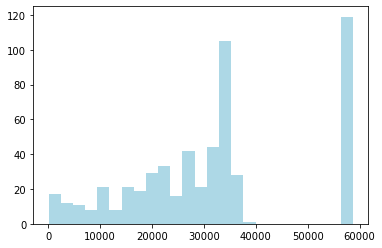

In [26]:
#Answer here
import matplotlib.pyplot as plt
x = bank['CERT']
plt.hist(x, 25, histtype='stepfilled', align='mid', color='lightblue', label='Certification')

dist_cert =bank['CERT'].describe(percentiles=[.1])
print(dist_cert)

Part (b) [5 points]

Subset the original data frame to only consider records for which CERT is smaller than 10th percentile of the total.

In [27]:
#Answer here
bank2 = bank[bank['CERT']<10091.6]
bank2



,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
8,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17
11,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,29-Apr-16,6-Sep-16
23,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16
24,NBRS Financial,Rising Sun,MD,4862,Howard Bank,17-Oct-14,19-Feb-18
38,DuPage National Bank,West Chicago,IL,5732,Republic Bank of Chicago,17-Jan-14,20-Oct-16
65,Citizens First National Bank,Princeton,IL,3731,Heartland Bank and Trust Company,2-Nov-12,13-Feb-18
77,Heartland Bank,Leawood,KS,1361,Metcalf Bank,20-Jul-12,30-Jul-13
81,Glasgow Savings Bank,Glasgow,MO,1056,Regional Missouri Bank,13-Jul-12,19-Aug-14
83,The Farmers Bank of Lynchburg,Lynchburg,TN,1690,Clayton Bank and Trust,15-Jun-12,8-Aug-16


Part (c) [15 points]

Then, for the records found from Part (b), use pivot table method to obtain the min, max, and average CERT for each ST combination for which the number of records is more than 1. You should have the state as the index for your dataframe and then 4 columns: min_CERT, max_CERT, mean_CERT, and Rec_num, where Rec_num is the number of records. 

In [28]:
#Answer here
pivot = pd.pivot_table(bank2,index="ST",values = "CERT",aggfunc={np.min,np.max,np.mean,np.count_nonzero})
pivot

,amax,amin,count_nonzero,mean
ST,,,,
AL,9609.0,9609.0,1.0,9609.000000
AR,91.0,91.0,1.0,91.000000
CO,2994.0,2994.0,1.0,2994.000000
FL,9619.0,5672.0,2.0,7645.500000
GA,10054.0,151.0,7.0,4625.857143
IL,10086.0,916.0,12.0,5583.750000
IN,4392.0,4392.0,1.0,4392.000000
KS,4754.0,1361.0,5.0,4040.800000
MD,4862.0,4862.0,1.0,4862.000000


Part (d) [10 points]

Finally, display a bar plot for the first 3 states in the resulting data frame (from part (c)). In this plot, each of the 3 states will be on x axis, and the corresponding 3 summary statistics will be the 3 bars - stacked bar plot.

<AxesSubplot:xlabel='ST'>

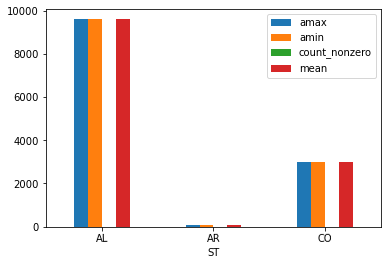

In [29]:
#Answer here
pivot[:3].plot(kind= 'bar',rot=True)